In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.datasets import load_iris

# Task 1: Exploratory Data Analysis (EDA)

# Load the dataset (Iris dataset as an example)
df = pd.read_csv('/content/wine.csv')

In [3]:
# Basic data exploration
print(df.head())
print(df.describe())


   Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     1    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0           0.28             2.29   5.64  1.04      3.92     1065  
1           0.26             1.28   4.38  1.05      3.40     1050  
2           0.30             2.81   5.68  1.03      3.17     1185  
3           0.24             2.18   7.80  0.86      3.45     1480  
4           0.39             1.82   4.32  1.04      2.93      735  
             Type     Alcohol       Malic         Ash  Alcalinity   Magnesium  \
count  178.000000  178.000000  178.000000  178.0

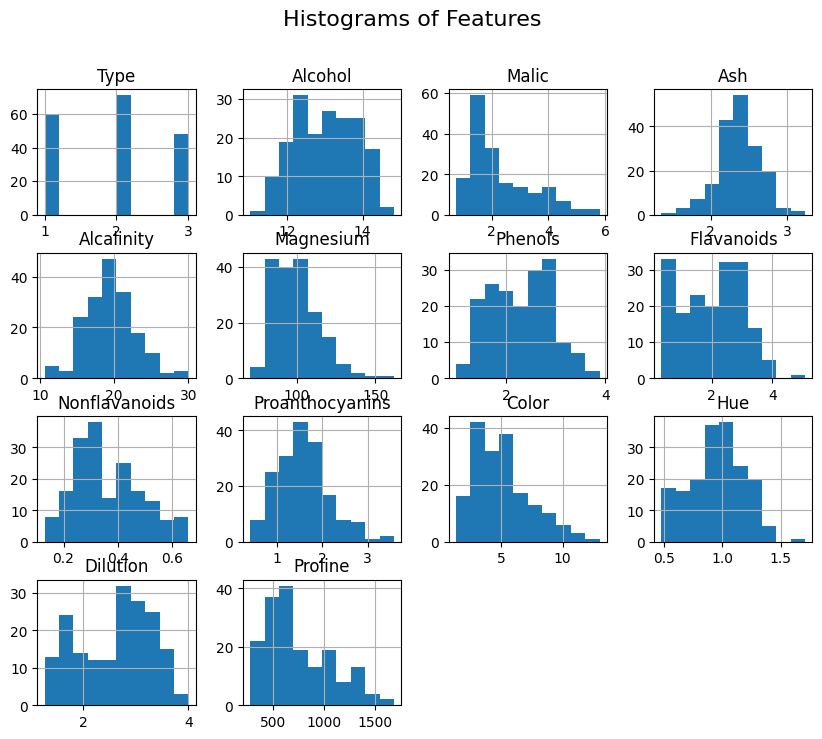

In [4]:
# Examine the distribution of features
df.hist(figsize=(10, 8))
plt.suptitle('Histograms of Features', size=16)
plt.show()

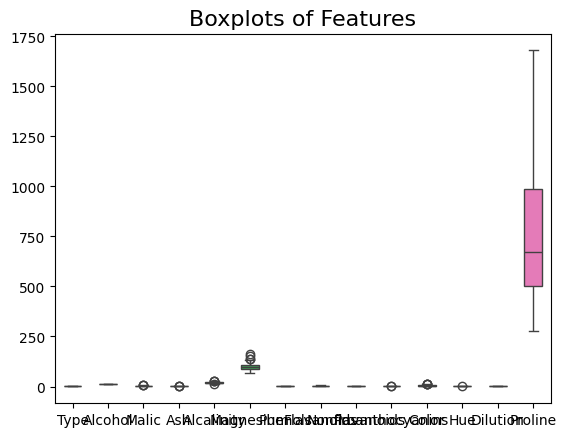

In [5]:
# Box plots for features
sns.boxplot(data=df, width=0.5)
plt.title('Boxplots of Features', size=16)
plt.show()


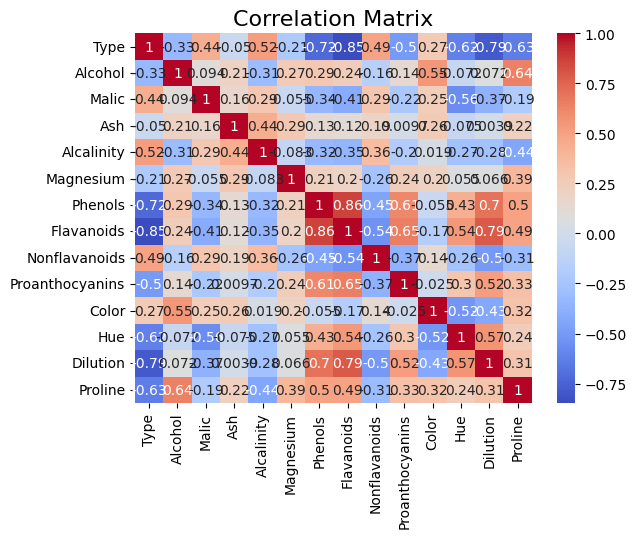

In [6]:
# Investigate correlations between features
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title('Correlation Matrix', size=16)
plt.show()

In [7]:
# Task 2: Dimensionality Reduction with PCA

# 1. Standardize the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [8]:
# 2. Apply PCA
pca = PCA()
pca.fit(df_scaled)

PCA()

In [9]:
# 3. Explained variance and scree plot
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

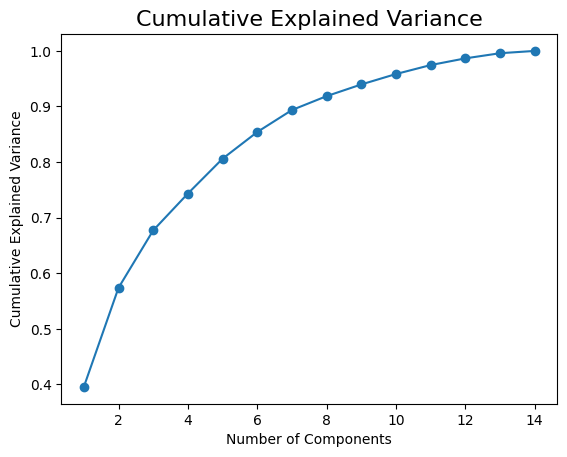

In [10]:
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, marker='o')
plt.title('Cumulative Explained Variance', size=16)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [11]:
# 4. Transform the original dataset into principal components
df_pca = pca.transform(df_scaled)

In [12]:
# Task 3: Clustering with Original Data

# Create a DataFrame from PCA components and assign column names
df_pca_df = pd.DataFrame(df_pca, columns=[f'PC{i+1}' for i in range(df_pca.shape[1])])

In [13]:
# Apply K-means clustering on PCA-transformed data
kmeans_pca = KMeans(n_clusters=3, random_state=42)
df_pca_df['Cluster'] = kmeans_pca.fit_predict(df_pca_df)

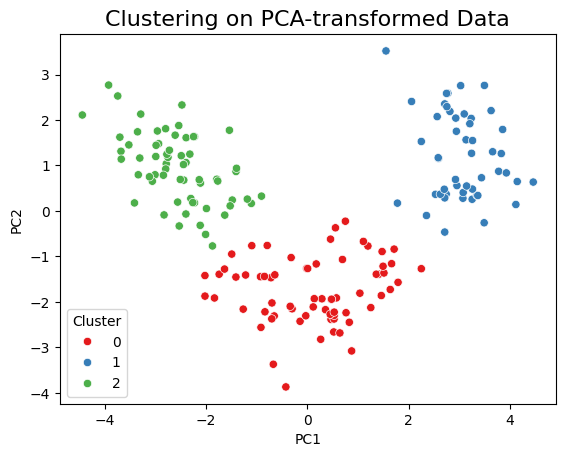

In [14]:
# Visualize the clustering results after PCA (using first 2 components)
sns.scatterplot(x=df_pca_df['PC1'], y=df_pca_df['PC2'], hue='Cluster', palette='Set1', data=df_pca_df)
plt.title('Clustering on PCA-transformed Data', size=16)
plt.show()

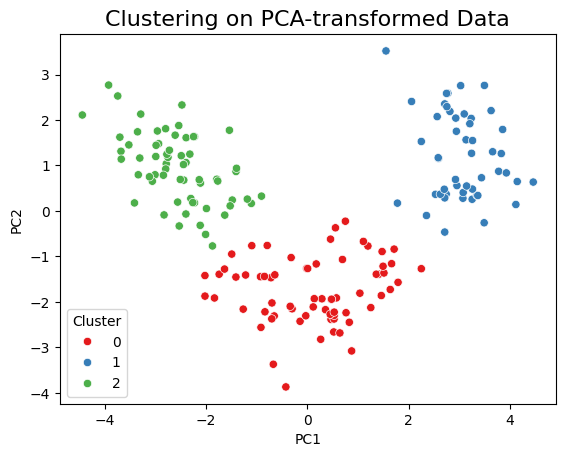

In [15]:
# Visualize the clustering results after PCA (using first 2 components)
sns.scatterplot(x=df_pca_df.iloc[:, 0], y=df_pca_df.iloc[:, 1], hue='Cluster', palette='Set1', data=df_pca_df)
plt.title('Clustering on PCA-transformed Data', size=16)
plt.show()


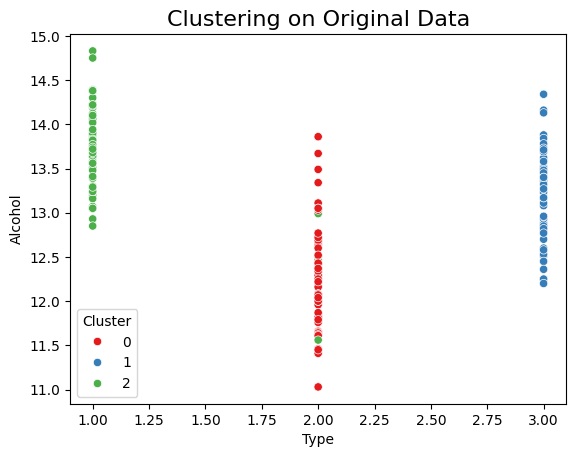

In [16]:
# Visualize the clustering results (using 2D projection)
sns.scatterplot(x=df.iloc[:, 0], y=df.iloc[:, 1], hue='Cluster', palette='Set1', data=df_pca_df)
plt.title('Clustering on Original Data', size=16)
plt.show()

In [17]:
# Evaluate clustering performance
sil_score = silhouette_score(df.iloc[:, :-1], df_pca_df['Cluster'])
db_score = davies_bouldin_score(df.iloc[:, :-1], df_pca_df['Cluster'])
print(f"Silhouette Score (Original Data): {sil_score}")
print(f"Davies-Bouldin Index (Original Data): {db_score}")


Silhouette Score (Original Data): 0.07424605691552298
Davies-Bouldin Index (Original Data): 2.3031384613995582


In [18]:
# Task 4: Clustering with PCA Data

# Apply K-means clustering on PCA-transformed data
df_pca_df = pd.DataFrame(df_pca)
kmeans_pca = KMeans(n_clusters=3, random_state=42)
df_pca_df['Cluster'] = kmeans_pca.fit_predict(df_pca_df)

In [19]:
# Create a DataFrame from PCA components and assign column names
df_pca_df = pd.DataFrame(df_pca, columns=[f'PC{i+1}' for i in range(df_pca.shape[1])])

In [20]:
# Apply K-means clustering on PCA-transformed data
kmeans_pca = KMeans(n_clusters=3, random_state=42)
df_pca_df['Cluster'] = kmeans_pca.fit_predict(df_pca_df)

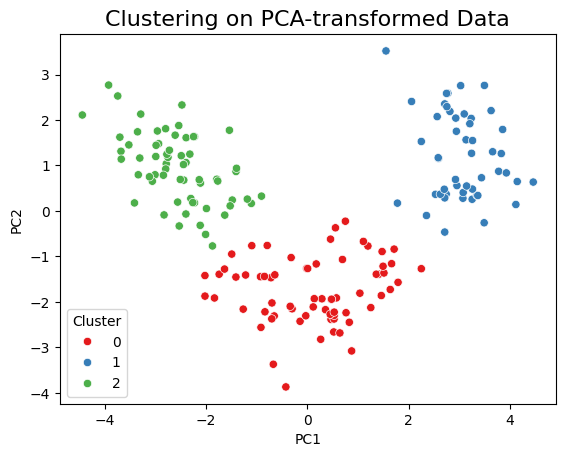

In [21]:
# Visualize the clustering results after PCA (using first 2 components)
sns.scatterplot(x=df_pca_df['PC1'], y=df_pca_df['PC2'], hue='Cluster', palette='Set1', data=df_pca_df)
plt.title('Clustering on PCA-transformed Data', size=16)
plt.show()


In [22]:
# Evaluate clustering performance on PCA-transformed data
sil_score_pca = silhouette_score(df_pca_df.iloc[:, :-1], df_pca_df['Cluster'])
db_score_pca = davies_bouldin_score(df_pca_df.iloc[:, :-1], df_pca_df['Cluster'])
print(f"Silhouette Score (PCA Data): {sil_score_pca}")
print(f"Davies-Bouldin Index (PCA Data): {db_score_pca}")

Silhouette Score (PCA Data): 0.30648398324833453
Davies-Bouldin Index (PCA Data): 1.315707552261773


In [23]:
# Task 5: Comparison and Analysis

# Compare clustering performance
print(f"Silhouette Score Comparison: {sil_score} (Original) vs {sil_score_pca} (PCA)")
print(f"Davies-Bouldin Index Comparison: {db_score} (Original) vs {db_score_pca} (PCA)")


Silhouette Score Comparison: 0.07424605691552298 (Original) vs 0.30648398324833453 (PCA)
Davies-Bouldin Index Comparison: 2.3031384613995582 (Original) vs 1.315707552261773 (PCA)


In [24]:
# Reflecting on the findings
print("\nConclusion and Insights:")
print("PCA helps in reducing dimensionality and potentially improving clustering performance due to noise reduction.")
print("Clustering on original data might work well for datasets with clear patterns, but PCA can improve results for high-dimensional data.")
print("In practice, PCA is useful when the number of features is large, and computational efficiency or overfitting is a concern.")


Conclusion and Insights:
PCA helps in reducing dimensionality and potentially improving clustering performance due to noise reduction.
Clustering on original data might work well for datasets with clear patterns, but PCA can improve results for high-dimensional data.
In practice, PCA is useful when the number of features is large, and computational efficiency or overfitting is a concern.
